In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv('../data/listings.csv')



Saving listings.csv to listings.csv


In [3]:

df = pd.read_csv('listings.csv')  # El archivo se guarda en el entorno temporal de Colab
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_listings_new =  df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'price']]

In [5]:
df_listings_new.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
0,4,1.0,1.0,1.0,1,95.0,$85.00
1,4,1.0,1.0,1.0,2,96.0,$150.00
2,11,4.5,5.0,7.0,4,97.0,$975.00
3,3,1.0,0.0,2.0,1,NaN,$100.00
4,6,2.0,3.0,3.0,1,92.0,$450.00


In [6]:
df_listings_new["price"] = (
    df_listings_new["price"]
    .str.replace("$", "", regex=False)  # Eliminar $
    .str.replace(",", "", regex=False)  # Eliminar comas (opcional, si existen)
    .str.strip()  # Eliminar espacios en blanco
    .astype(float)  # Convertir a float
)

# Verificar el resultado
print(df_listings_new["price"].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


<ipython-input-6-3167006359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_new["price"] = (


# revision valores atipicos

In [7]:
df_listings_new.columns


Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'review_scores_rating', 'price'],
      dtype='object')

In [8]:
print(df_listings_new.dtypes)

accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
minimum_nights            int64
review_scores_rating    float64
price                   float64
dtype: object


In [9]:
# Eliminar filas con NaN en las columnas numéricas
df_clean = df_listings_new.dropna(subset=['accommodates', 'bathrooms', 'bedrooms', 'beds',
                             'minimum_nights', 'review_scores_rating', 'price'])

# Verificar que no queden NaN
print(df_clean.isna().sum())

accommodates            0
bathrooms               0
bedrooms                0
beds                    0
minimum_nights          0
review_scores_rating    0
price                   0
dtype: int64


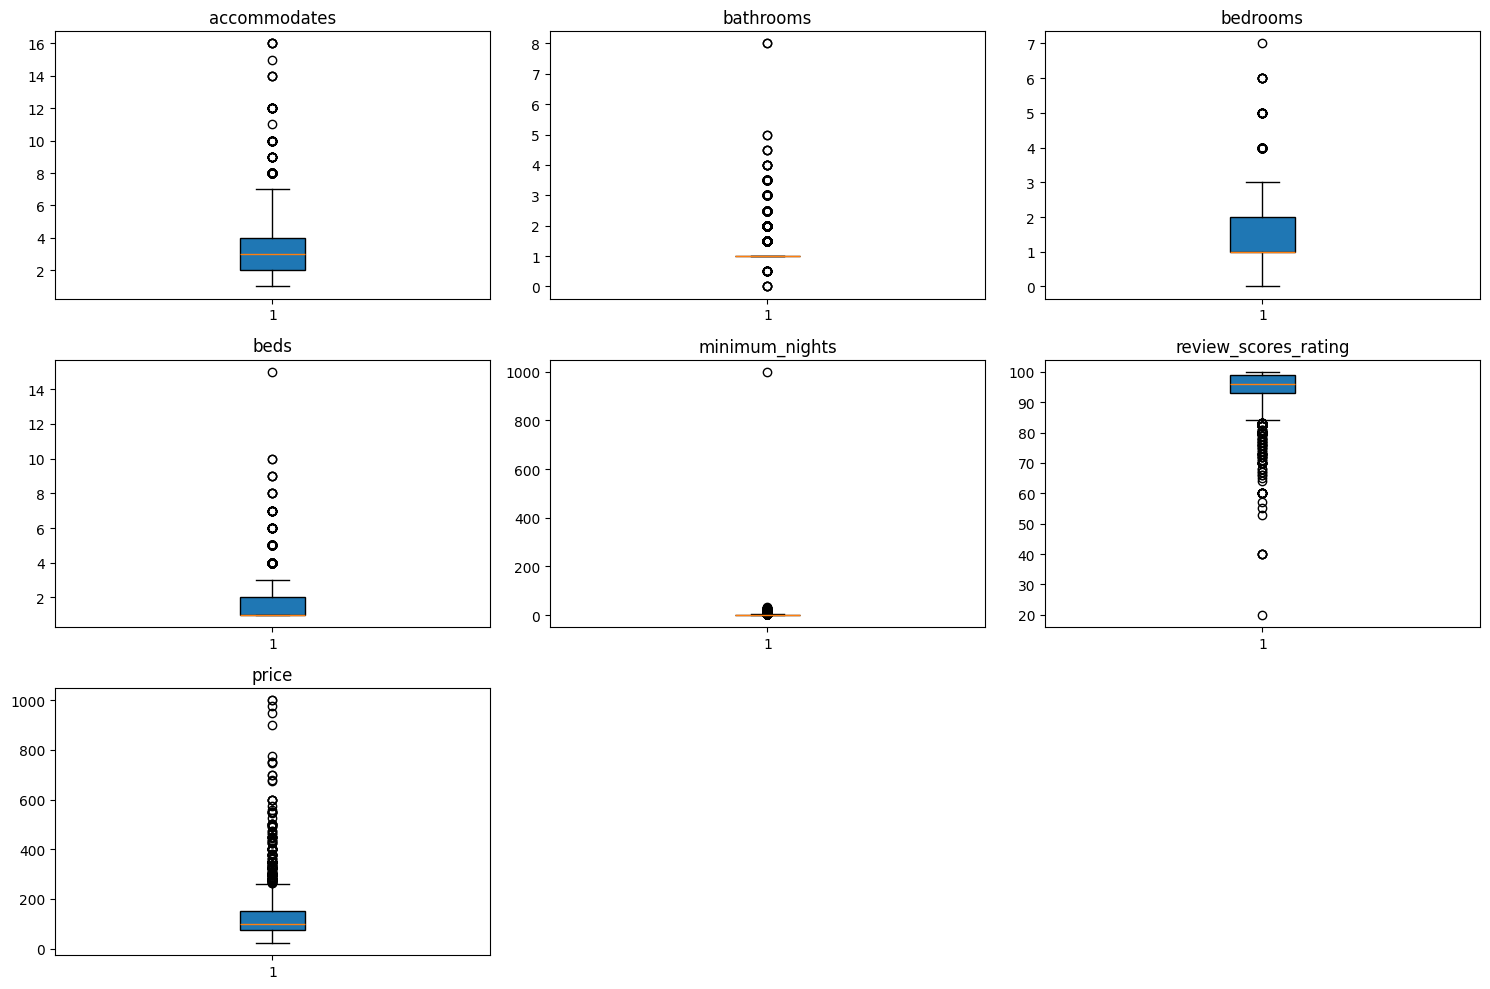

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
columnas_numericas = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                      'minimum_nights', 'review_scores_rating', 'price']

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_clean[col], vert=True, patch_artist=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['accommodates'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)


-1.0 7.0


In [12]:
df_clean[(df_clean['accommodates'] < lim_inf) | (df_clean['accommodates'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
2,11,4.5,5.0,7.0,4,97.0,975.0
14,16,3.5,6.0,15.0,3,98.0,461.0
19,10,3.5,5.0,5.0,3,85.0,700.0
22,8,2.0,4.0,4.0,4,100.0,450.0
25,8,2.5,3.0,5.0,4,100.0,450.0
...,...,...,...,...,...,...,...
3701,8,3.0,4.0,4.0,1,100.0,450.0
3708,12,3.0,4.0,6.0,1,100.0,300.0
3753,8,2.5,3.0,3.0,29,100.0,400.0
3771,8,2.5,3.0,3.0,1,96.0,325.0


In [13]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['accommodates'] >= lim_inf) & (df_clean['accommodates'] <= lim_sup)]

In [14]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['bathrooms'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)


1.0 1.0


In [15]:
df_clean[(df_clean['bathrooms'] < lim_inf) | (df_clean['bathrooms'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
4,6,2.0,3.0,3.0,1,92.0,450.0
21,3,1.5,1.0,2.0,1,84.0,99.0
24,5,2.5,3.0,3.0,3,100.0,600.0
28,6,2.0,3.0,3.0,2,100.0,300.0
31,6,1.5,3.0,3.0,2,92.0,325.0
...,...,...,...,...,...,...,...
3760,4,2.5,3.0,3.0,1,100.0,150.0
3786,1,1.5,1.0,1.0,1,98.0,87.0
3787,6,2.5,3.0,4.0,3,98.0,260.0
3808,6,2.0,3.0,3.0,3,96.0,175.0


In [16]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['bathrooms'] >= lim_inf) & (df_clean['bathrooms'] <= lim_sup)]

In [17]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['bedrooms'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)


1.0 1.0


In [18]:
df_clean[(df_clean['bedrooms'] < lim_inf) | (df_clean['bedrooms'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
12,4,1.0,2.0,3.0,3,98.0,245.0
13,5,1.0,2.0,3.0,2,100.0,165.0
15,5,1.0,2.0,2.0,3,80.0,109.0
34,4,1.0,2.0,2.0,1,97.0,159.0
39,2,1.0,0.0,1.0,3,98.0,80.0
...,...,...,...,...,...,...,...
3804,2,1.0,0.0,1.0,2,95.0,125.0
3805,6,1.0,2.0,2.0,2,98.0,100.0
3806,4,1.0,2.0,2.0,1,100.0,160.0
3807,2,1.0,0.0,1.0,1,97.0,109.0


In [19]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['bedrooms'] >= lim_inf) & (df_clean['bedrooms'] <= lim_sup)]

In [20]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['beds'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)


1.0 1.0


In [21]:
df_clean[(df_clean['beds'] < lim_inf) | (df_clean['beds'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
29,3,1.0,1.0,2.0,2,85.0,80.0
35,4,1.0,1.0,2.0,2,95.0,125.0
38,4,1.0,1.0,2.0,2,100.0,150.0
40,4,1.0,1.0,2.0,2,90.0,110.0
41,3,1.0,1.0,2.0,3,91.0,148.0
...,...,...,...,...,...,...,...
3777,4,1.0,1.0,2.0,2,96.0,120.0
3782,3,1.0,1.0,2.0,3,97.0,99.0
3788,4,1.0,1.0,2.0,1,99.0,115.0
3812,4,1.0,1.0,2.0,3,96.0,95.0


In [22]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['beds'] >= lim_inf) & (df_clean['beds'] <= lim_sup)]

In [23]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['minimum_nights'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)


-0.5 3.5


In [24]:
df_clean[(df_clean['minimum_nights'] < lim_inf) | (df_clean['minimum_nights'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
144,2,1.0,1.0,1.0,14,99.0,53.0
155,2,1.0,1.0,1.0,5,90.0,70.0
156,1,1.0,1.0,1.0,30,97.0,52.0
173,1,1.0,1.0,1.0,4,89.0,75.0
186,2,1.0,1.0,1.0,14,95.0,65.0
...,...,...,...,...,...,...,...
3748,1,1.0,1.0,1.0,7,100.0,62.0
3761,2,1.0,1.0,1.0,4,93.0,85.0
3776,2,1.0,1.0,1.0,5,99.0,115.0
3801,2,1.0,1.0,1.0,4,100.0,108.0


In [25]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['minimum_nights'] >= lim_inf) & (df_clean['minimum_nights'] <= lim_sup)]

In [26]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['review_scores_rating'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

84.0 108.0


In [27]:
df_clean[(df_clean['review_scores_rating'] < lim_inf) | (df_clean['review_scores_rating'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
100,2,1.0,1.0,1.0,3,80.0,75.0
254,2,1.0,1.0,1.0,1,80.0,95.0
352,2,1.0,1.0,1.0,1,73.0,80.0
438,2,1.0,1.0,1.0,1,80.0,160.0
451,2,1.0,1.0,1.0,1,80.0,50.0
...,...,...,...,...,...,...,...
3148,2,1.0,1.0,1.0,2,40.0,110.0
3271,1,1.0,1.0,1.0,1,80.0,80.0
3507,4,1.0,1.0,1.0,2,80.0,95.0
3512,2,1.0,1.0,1.0,1,80.0,80.0


In [28]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['review_scores_rating'] >= lim_inf) & (df_clean['review_scores_rating'] <= lim_sup)]

In [29]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df_clean['price'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

-15.0 193.0


In [30]:
df_clean[(df_clean['price'] < lim_inf) | (df_clean['price'] > lim_sup)]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
108,4,1.0,1.0,1.0,2,95.0,200.0
112,3,1.0,1.0,1.0,2,95.0,200.0
202,2,1.0,1.0,1.0,2,97.0,199.0
233,2,1.0,1.0,1.0,3,100.0,209.0
479,2,1.0,1.0,1.0,2,100.0,209.0
812,2,1.0,1.0,1.0,1,100.0,210.0
1077,3,1.0,1.0,1.0,2,94.0,199.0
1122,2,1.0,1.0,1.0,2,90.0,195.0
1151,2,1.0,1.0,1.0,3,96.0,220.0
1160,2,1.0,1.0,1.0,1,100.0,220.0


In [31]:
# elimino los valores atípicos
df_clean = df_clean[(df_clean['price'] >= lim_inf) & (df_clean['price'] <= lim_sup)]

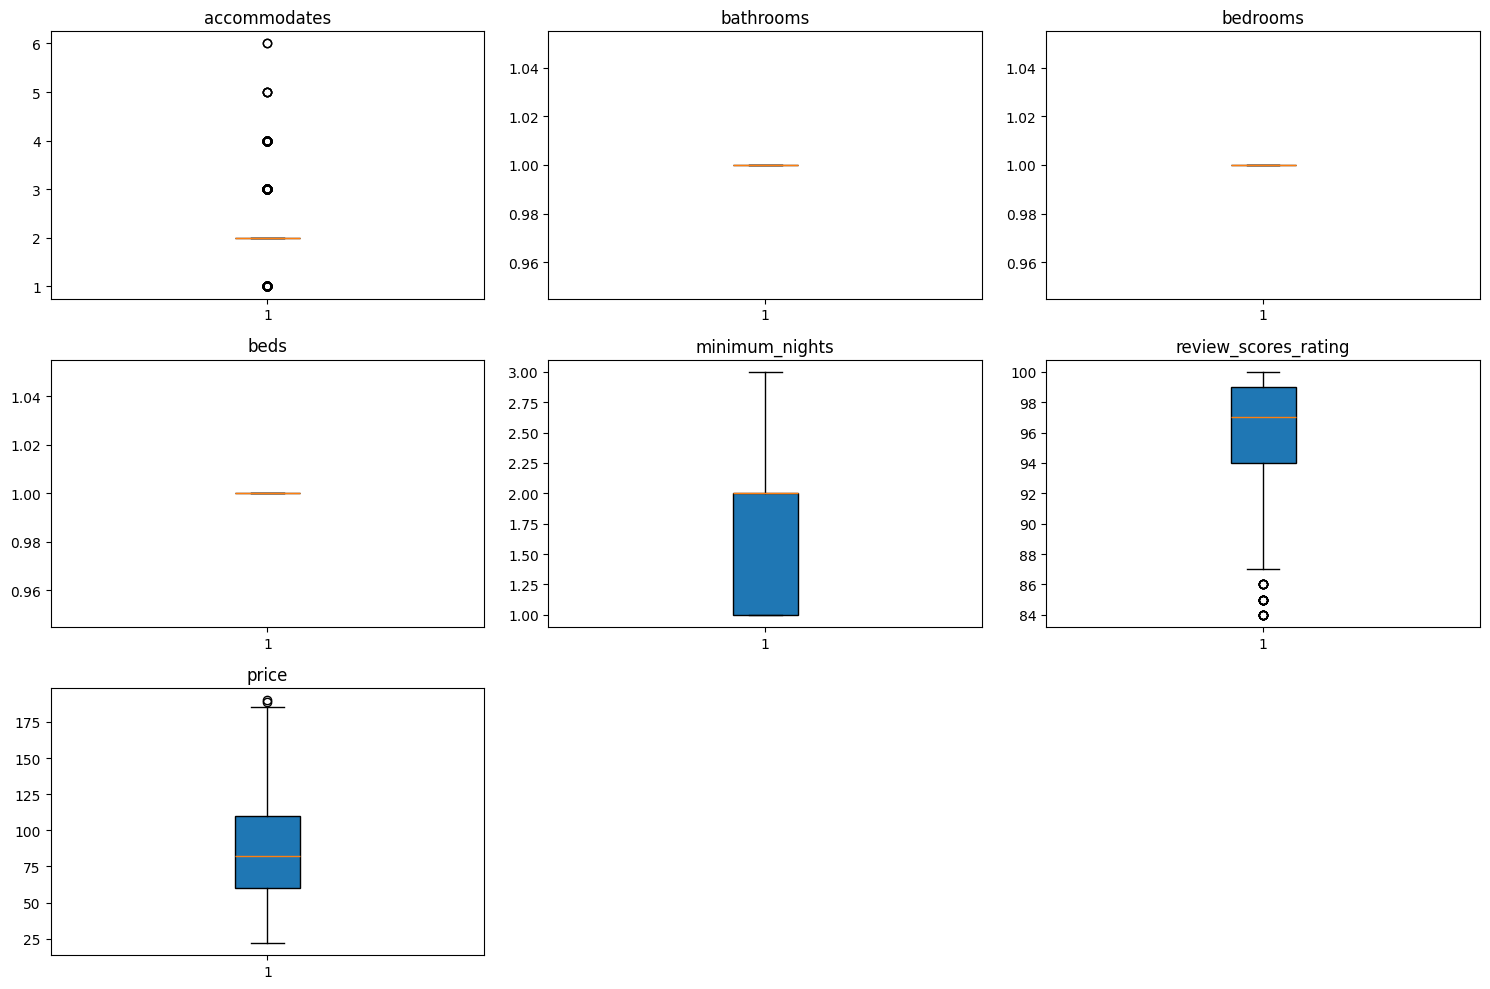

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
columnas_numericas = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                      'minimum_nights', 'review_scores_rating', 'price']

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_clean[col], vert=True, patch_artist=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## ESTANDARIZACION

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [34]:
df = df_clean

In [35]:
scaler = MinMaxScaler()

In [36]:
# columnas con valores numericos
df.select_dtypes(include=[np.number]).columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'review_scores_rating', 'price'],
      dtype='object')

In [37]:
df


,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
0,4,1.0,1.0,1.0,1,95.0,85.0
1,4,1.0,1.0,1.0,2,96.0,150.0
5,2,1.0,1.0,1.0,1,95.0,120.0
6,2,1.0,1.0,1.0,3,99.0,80.0
7,2,1.0,1.0,1.0,2,97.0,60.0
...,...,...,...,...,...,...,...
3794,2,1.0,1.0,1.0,2,90.0,107.0
3796,2,1.0,1.0,1.0,2,98.0,85.0
3798,2,1.0,1.0,1.0,2,98.0,77.0
3799,2,1.0,1.0,1.0,2,95.0,65.0


In [38]:
columnas_escalar = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                    'minimum_nights', 'review_scores_rating', 'price']

# Escalar las columnas y reemplazarlas en el DataFrame
df[columnas_escalar] = scaler.fit_transform(df[columnas_escalar])

# Verificar resultados
df.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,price
0,0.6,0.0,0.0,0.0,0.0,0.6875,0.375000
1,0.6,0.0,0.0,0.0,0.5,0.7500,0.761905
5,0.2,0.0,0.0,0.0,0.0,0.6875,0.583333
6,0.2,0.0,0.0,0.0,1.0,0.9375,0.345238
7,0.2,0.0,0.0,0.0,0.5,0.8125,0.226190


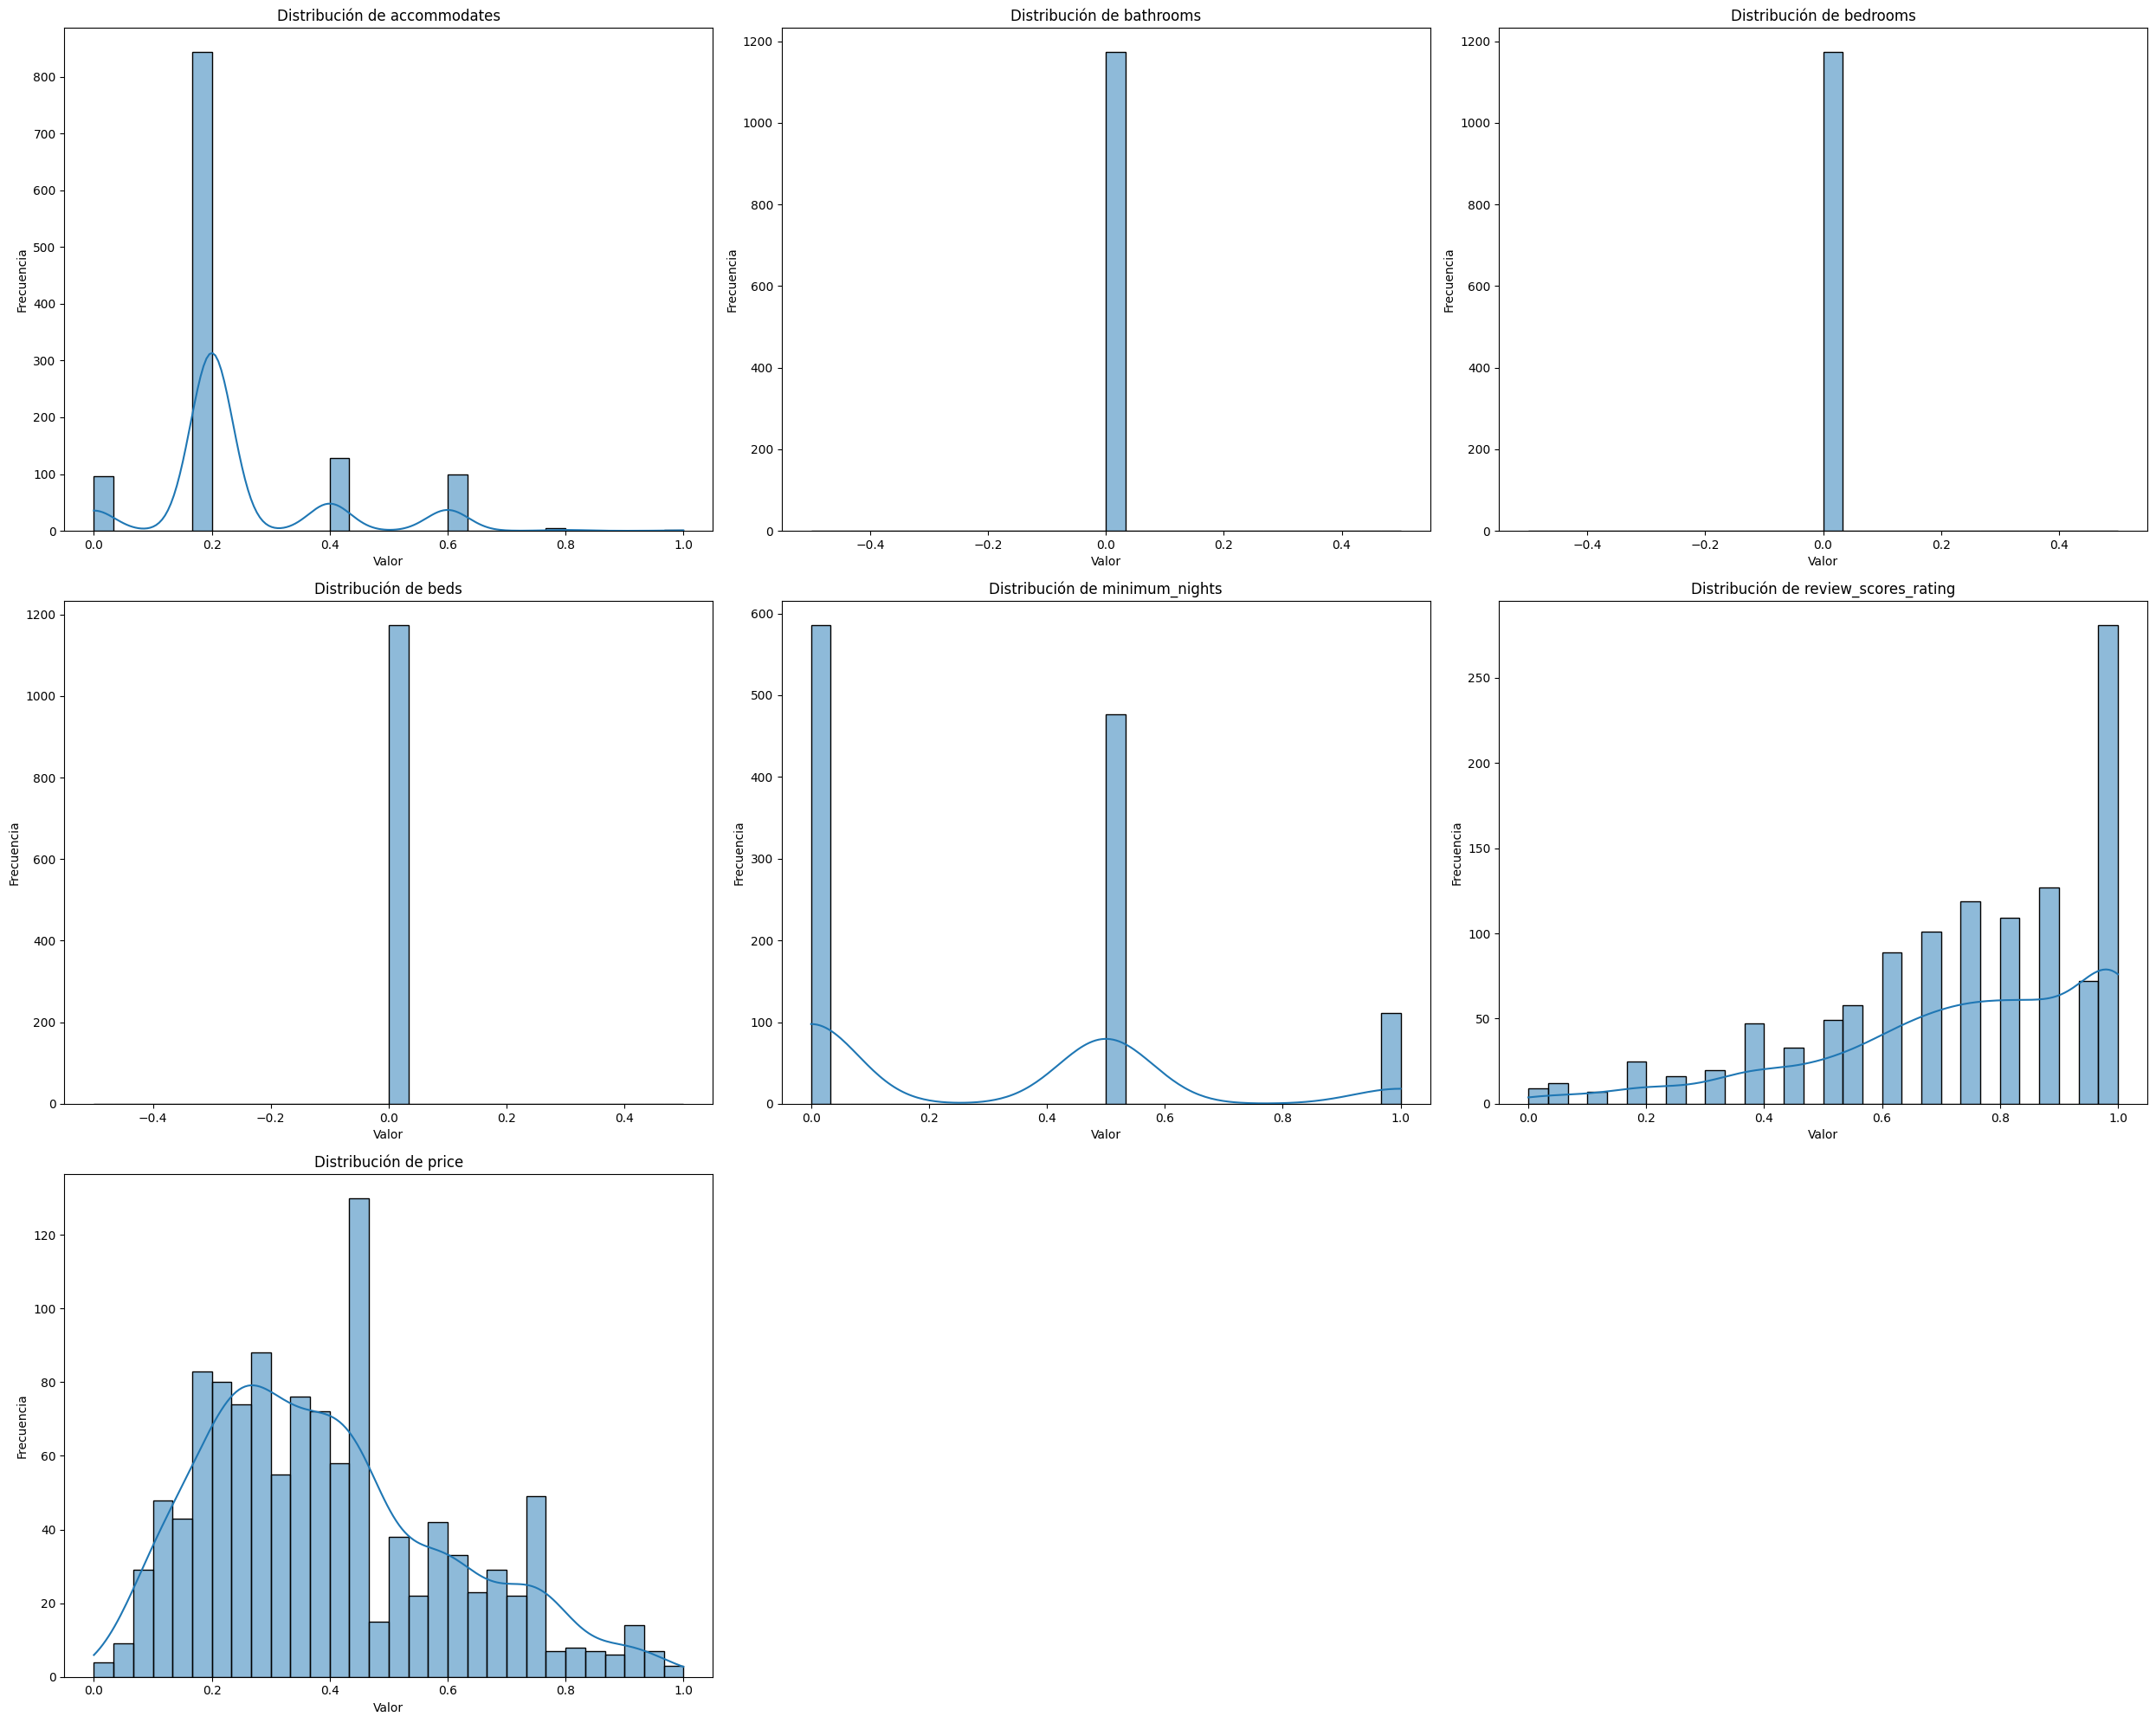

In [39]:
# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Lista de columnas a visualizar
columnas_numericas = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                     'minimum_nights', 'review_scores_rating', 'price']

# Crear un histograma + KDE para cada columna
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas, posición i
    sns.histplot(df[col].dropna(), kde=True, bins=30)  # Elimina NaNs y grafica
    plt.title(f'Distribución de {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 0 to 3811
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          1174 non-null   float64
 1   bathrooms             1174 non-null   float64
 2   bedrooms              1174 non-null   float64
 3   beds                  1174 non-null   float64
 4   minimum_nights        1174 non-null   float64
 5   review_scores_rating  1174 non-null   float64
 6   price                 1174 non-null   float64
dtypes: float64(7)
memory usage: 73.4 KB


## modelos

In [41]:
# separo en X & y
X = df.drop(['price'], axis=1)
y = df['price']


In [42]:
X.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating
0,0.6,0.0,0.0,0.0,0.0,0.6875
1,0.6,0.0,0.0,0.0,0.5,0.7500
5,0.2,0.0,0.0,0.0,0.0,0.6875
6,0.2,0.0,0.0,0.0,1.0,0.9375
7,0.2,0.0,0.0,0.0,0.5,0.8125


In [43]:
y.head()

,price
0,0.375000
1,0.761905
5,0.583333
6,0.345238
7,0.226190


In [44]:
import tensorflow as tf
print(tf.__version__)  # Para TensorFlow 2.x

2.18.0


In [45]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(821, 6)
(353, 6)
(821,)
(353,)


In [47]:
#creando un modelo secuencial
model = Sequential()

#agregue una capa densa de 128 neuronas, con relu como función de activación, junto con eso, input_dim se establecerá en 6, ya que hay 6 parámetros iniciales como los generados por el bloque de código anterior.
model.add(Dense(128, activation='relu', input_dim=6))

#agrega 2 capas densas ocultas más, la primera con 64 neuronas y la siguiente con 32 neuronas, usando activación relu
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

#agrega la capa de salida con 1 neurona, ya que nuestra salida es solo el 'precio'
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#compilar el modelo utilizando el error cuadrático medio como una pérdida porque estamos haciendo un modelo de regresión
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#Almacene el modelo entrenado (model.fit) dentro de un historial para devoluciones de llamadas en el futuro o referencias y entrenamiento adicional para hacerlo más preciso
history = model.fit(X_train, y_train, epochs = 50)

#Obtener predicciones de los conjuntos de datos entrenados y de prueba
preds_train = model.predict(X_train)
preds = model.predict(X_test)

#Redondea estas predicciones ya que son el precio de alquilar la ubicación específica de Airbnb, y el precio no puede ser mayor a centavos (por lo tanto, redondea a 2 lugares)
preds_round = np.round(preds,2)
preds_train_round = np.round(preds_train,2)

#Producir las predicciones realizadas por el modelo
print('Here are the predictions of the prices: \n', preds_round)

#Las dos líneas de código a continuación muestran el RMSE (error cuadrático medio) de los datos entrenados y los predichos. Cuanto más cercanos sean los valores, mejor funcionará el modelo de red neuronal/keras.
print(np.sqrt(mean_squared_error(y_train, preds_train_round)))
print(np.sqrt(mean_squared_error(y_test, preds_round)))

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1407 - mse: 0.1407
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0360 - mse: 0.0360
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 - mse: 0.0348
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322 - mse: 0.0322
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335 - mse: 0.0335
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0341 - mse: 0.0341
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0367 - mse: 0.0367
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 - mse: 0.0320 
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - mse: 0.0316 
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349 - mse: 0.0349 
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335 - mse: 0.0335 
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0325 - mse: 0.0325 
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [50]:
#Asignar los valores reales y previstos del precio de los listados a un nuevo marco de datos llamado "precio". Este marco puede generarse mostrando la diferencia entre el precio real y el previsto para que el usuario pueda evaluar la precisión de la red neuronal.
price = np.column_stack((y_test, preds_round))
print ('This array contains the actual, price vs the predicted price based on the keras model.\n', price)

This array contains the actual, price vs the predicted price based on the keras model.
 [[0.19642857 0.44      ]
 [0.77380952 0.47999999]
 [0.25595238 0.19      ]
 [0.99404762 0.63      ]
 [0.39880952 0.40000001]
 [0.20238095 0.38999999]
 [0.25595238 0.33000001]
 [0.33928571 0.15000001]
 [0.25       0.33000001]
 [0.31547619 0.33000001]
 [0.35714286 0.37      ]
 [0.25595238 0.33000001]
 [0.30357143 0.33000001]
 [0.75595238 0.41      ]
 [0.76190476 0.51999998]
 [0.19642857 0.41999999]
 [0.18452381 0.33000001]
 [0.0952381  0.38999999]
 [0.33928571 0.16      ]
 [0.5297619  0.43000001]
 [0.75595238 0.54000002]
 [0.08333333 0.18000001]
 [0.45833333 0.43000001]
 [0.28571429 0.33000001]
 [0.2797619  0.33000001]
 [0.31547619 0.43000001]
 [0.43452381 0.33000001]
 [0.39880952 0.56999999]
 [0.10119048 0.33000001]
 [0.27380952 0.41999999]
 [0.46428571 0.33000001]
 [0.28571429 0.40000001]
 [0.07738095 0.47999999]
 [0.46428571 0.41      ]
 [0.875      0.38      ]
 [0.30952381 0.63      ]
 [0.43452381

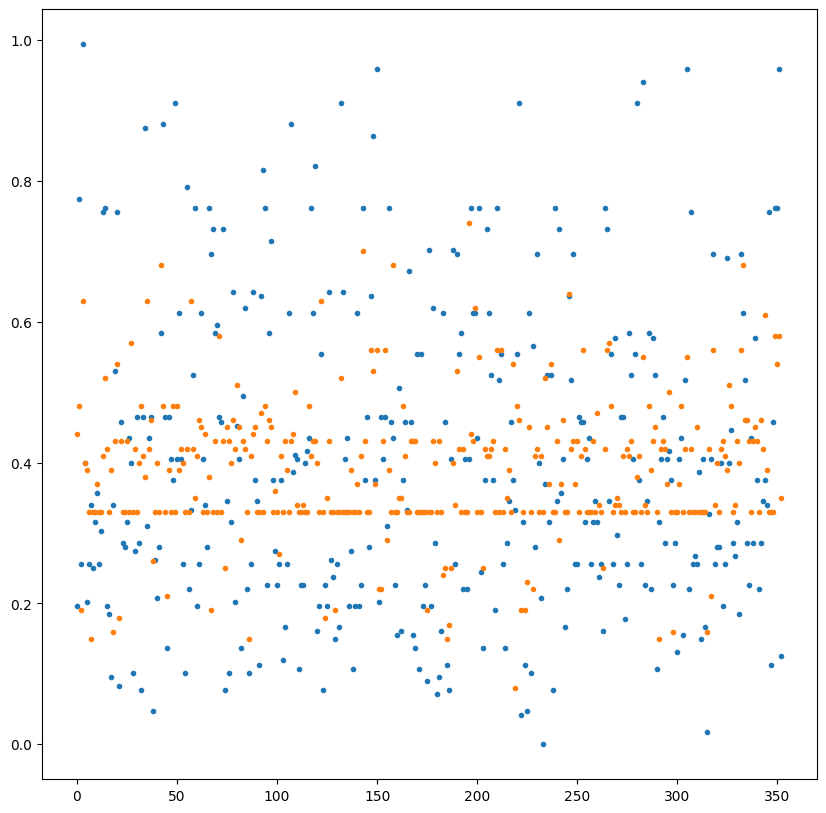

In [51]:
plt.figure(figsize=(10,10))
plt.plot(price, marker = '.', linestyle = '' )